<a href="https://colab.research.google.com/github/sampu78/SQL/blob/master/GBDT_on_Donar_choose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [78]:
#Importing Libraries

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , roc_auc_score
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.sparse import hstack

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
cd drive/'My Drive'/Files/

/content/drive/My Drive/Files


In [7]:
cd AppliedAI/DeepLearning_1/LSTM_on_Donar_Choose/

/content/drive/My Drive/AppliedAI/DeepLearning_1/LSTM_on_Donar_Choose


In [8]:
data = pd.read_csv('preprocessed_data.csv', nrows=50000)

In [11]:
data.shape

(50000, 9)

In [12]:
y = data.project_is_approved
X = data.drop(["project_is_approved"], axis=1)

## Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, stratify=y)

## Defining One Hot Encoding

In [17]:
def convert_text_into_TFIDF(feature):
  vectorizer = TfidfVectorizer(min_df = 10, ngram_range=(1,4), max_features=5000)
  vectorizer.fit(X_train[feature].values)
  X_train_ohe = vectorizer.transform(X_train[feature].values)
  X_test_ohe = vectorizer.transform(X_test[feature].values)
  return vectorizer, X_train_ohe, X_test_ohe

In [19]:
with open('glove_vectors', 'rb') as f:
  model = pickle.load(f)
  glove_words = set(model.keys())
  
def calculate_TFIDF_Weighted_W2V(feature_value, dictionary, tfidf_words):
  tfidf_w2v_vectors = []
  for sentence in feature_value:
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
      if(word in tfidf_words) and (word in glove_words):
        vec = model[word]
        tf_idf = dictionary[word] * (sentence.count(word)/len(sentence.split()))
        vector += (vec * tf_idf)
        tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
      vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
  return tfidf_w2v_vectors


def convert_Text_Into_TFIDF_Weighted_W2V(feature):
  tfidf_model = TfidfVectorizer()
  tfidf_model.fit(X_train[feature].values)
  dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
  tfidf_words = set(tfidf_model.get_feature_names())
  X_train_tfidf_w2v = calculate_TFIDF_Weighted_W2V(X_train[feature].values, dictionary, tfidf_words)
  X_test_tfidf_w2v = calculate_TFIDF_Weighted_W2V(X_test[feature].values, dictionary,tfidf_words)
  return tfidf_model, X_train_tfidf_w2v, X_test_tfidf_w2v

## Function for Response  Coding

In [20]:
def get_response_code(X_train, y_train):
  df = pd.DataFrame({ 'X_train': X_train, 'y_train' : y_train })
  categories = df.X_train.unique()
  lst_response_code = []
  for category in categories:
    probablity_0 = 0
    probablity_1 = 0
    df_category = df[df.X_train == category]
    for i in range(len(df_category)):
      if df_category.X_train.values[i] == category:
        if df_category.y_train.values[i] == 0:
          probablity_0 += 1
        else:
          probablity_1 += 1
    response_code = {'category' : category,
                    'category_0' : probablity_0,
                    'category_1' : probablity_1,
                    'category_tot': probablity_0+ probablity_1 }
    lst_response_code.append(response_code)
  return pd.DataFrame(lst_response_code)


In [21]:
def encode_categorical_with_response_code(X, df_response_code):
  lst_category_0_1 = []
  for data in X:
    df_res = df_response_code[df_response_code.category == data]
    if len(df_res) != 0:
      lst_category_0_1.append([df_res.category_0.values[0] / df_res.category_tot.values[0],df_res.category_1.values[0] / df_res.category_tot.values[0]])
    else:
      lst_category_0_1.append([0.5, 0.5])
  return lst_category_0_1


In [22]:
def convert_categorical_Into_1_and_0(feature):
  df_response_code = get_response_code(X_train[feature], y_train)
  X_train_0_1 = encode_categorical_with_response_code(X_train[feature].values, df_response_code)
  X_test_0_1 = encode_categorical_with_response_code(X_test[feature].values, df_response_code)
  return df_response_code, X_train_0_1, X_test_0_1


In [23]:
def encode_numerical_features(feature):
  normalizer = Normalizer()
  normalizer.fit(X_train[feature].values.reshape(1,-1))
  X_train_ohe = normalizer.transform(X_train[feature].values.reshape(1,-1))
  X_test_ohe = normalizer.transform(X_test[feature].values.reshape(1,-1))
  return normalizer, X_train_ohe.reshape(-1,1), X_test_ohe.reshape(-1,1)

In [24]:
def get_essay_sentiment_score(X_essay):

  sid = SentimentIntensityAnalyzer()

  lst_sentiments = []

  for data in X_essay:

    ss = sid.polarity_scores(data)

    lst_sentiments.append([ss['neg'], ss['neu'], ss['pos'], ss['compound']])
    
  return lst_sentiments

## Applying One Hot encoding on Categrical Features

In [25]:
#Performing Response code encoding for School State
df_rspnse_code_state, X_train_state_0_1, X_test_state_0_1 = convert_categorical_Into_1_and_0('school_state')
lst_state_features = df_rspnse_code_state.category.values

#Performing Response code encoding for tech_prefix
df_rspnse_code_tchr_prfx, X_train_tchr_prfx_0_1, X_test_tchr_prfx_0_1 = convert_categorical_Into_1_and_0('teacher_prefix')
lst_tchr_prfx_features = df_rspnse_code_tchr_prfx.category.values

#Performing Response code encoding for grade_category
df_rspnse_code_grade, X_train_grade_0_1, X_test_grade_0_1 = convert_categorical_Into_1_and_0('project_grade_category')
lst_grade_features = df_rspnse_code_grade.category.values

#Performing Response code encoding for categories
df_rspnse_code_categories, X_train_categories_0_1, X_test_categories_0_1 = convert_categorical_Into_1_and_0('clean_categories')
lst_categories_features = df_rspnse_code_categories.category.values

#Performing Response code encoding for subcategories
df_rspnse_code_subcategories, X_train_subcategories_0_1, X_test_subcategories_0_1 = convert_categorical_Into_1_and_0('clean_subcategories')
lst_subcategories_features = df_rspnse_code_subcategories.category.values


## Applying Normailzation on  Numerical Features

In [28]:
#Permoring normalization on teacher_number_of_previously_posted_projects
normalizer_prev_projects, X_train_prev_projects, X_test_prev_projects = encode_numerical_features('teacher_number_of_previously_posted_projects')

# Permoring normalization on Price
normalizer_price, X_train_price, X_test_price = encode_numerical_features('price')


## Essay Sentiment Score

In [34]:
lst_train_sentiments = get_essay_sentiment_score(X_train['essay'].values)

lst_test_sentiments = get_essay_sentiment_score(X_test['essay'].values)

## One hot encoding Essay

In [35]:
tfdif_vectorizer_essay, X_train_essay_tfidf, X_test_essay_tfidf = convert_text_into_TFIDF('essay')


In [36]:
w2v_vectorizer_essay, X_train_essay_w2v, X_test_essay_w2v = convert_Text_Into_TFIDF_Weighted_W2V('essay')


## Concatenating all Features

In [39]:
X_tr_set1 = hstack((X_train_state_0_1, X_train_tchr_prfx_0_1, X_train_grade_0_1, X_train_categories_0_1,X_train_subcategories_0_1, X_train_prev_projects, X_train_price, X_train_essay_tfidf,lst_train_sentiments)).tocsr()
X_te_set1 = hstack((X_test_state_0_1, X_test_tchr_prfx_0_1, X_test_grade_0_1, X_test_categories_0_1,X_test_subcategories_0_1, X_test_prev_projects, X_test_price, X_test_essay_tfidf,lst_test_sentiments)).tocsr()

In [40]:
X_tr_set2 = np.hstack((X_train_state_0_1, X_train_tchr_prfx_0_1, X_train_grade_0_1, X_train_categories_0_1,X_train_subcategories_0_1, X_train_prev_projects, X_train_price, X_train_essay_w2v,lst_train_sentiments))
X_te_set2 = np.hstack((X_test_state_0_1, X_test_tchr_prfx_0_1, X_test_grade_0_1, X_test_categories_0_1,X_test_subcategories_0_1, X_test_prev_projects, X_test_price, X_test_essay_w2v,lst_test_sentiments))


In [41]:
class CV_Results:
  def __init__(self, depth, estimator, acc_score):
    self.depth = depth
    self.estimator = estimator
    self.acc_score = acc_score


In [65]:
def getTrain_and_Cv_scores(grid_search):
  lst_train_scores = []
  lst_cv_scores = []
  idx_score = 0
  for i, depth in enumerate(depth_range):
    for j, estimator in enumerate(n_estimator):
      train_scores = []
      cv_scores = []
      for k in range(n_folds):
        k_fold_train_score = grid_search.cv_results_['split' + str(k) +'_train_score'][idx_score]
        k_fold_cv_score = grid_search.cv_results_['split' + str(k) +'_test_score'][idx_score]
        train_scores.append(k_fold_train_score)
        cv_scores.append(k_fold_cv_score)
      idx_score += 1
      train_result = CV_Results(depth, estimator, np.mean(np.array(train_scores)))
      cv_result = CV_Results(depth, estimator, np.mean(np.array(cv_scores)))
      lst_train_scores.append(train_result)
      lst_cv_scores.append(cv_result)
  return lst_train_scores, lst_cv_scores


In [63]:
def print_train_cv_score(lst_train_scores, lst_cv_scores):
  print('\n---------Train scores----------')

  for scores in lst_train_scores:

    print(f'Depth :{scores.depth} Estimator :{scores.estimator} Auc score:{scores.acc_score}')

  print('\n---------CV scores----------')
  for scores in lst_cv_scores:
    
    print(f'Depth :{scores.depth} Estimator :{scores.estimator} Auc score:{scores.acc_score}')


In [45]:
def plot_HeatMap(lst_train_scores, lst_cv_scores):
  lst_train_cv_scores = [lst_train_scores, lst_cv_scores]
  fig = plt.figure(figsize = (15,5))
  plot_counter = 1
  for data in lst_train_cv_scores:
    estimator = []
    depth = []
    auc_scores = []

    for x in data:
      estimator.append(x.estimator)
      depth.append(x.depth)
      auc_scores.append(x.acc_score)

    df = pd.DataFrame.from_dict(np.array([estimator,depth,auc_scores]).T)
    df.columns = ['Estimator','Depth','AUC Scores']
    df['AUC Scores'] = pd.to_numeric(df['AUC Scores'])
    pivotted= df.pivot('Estimator','Depth','AUC Scores')
    sns.heatmap(pivotted, ax= fig.add_subplot(1, 2, plot_counter), annot=True, cmap='coolwarm')
    if plot_counter == 1:
      plt.title('Train AUC Scores for each Hyperparameter')
    else:
      plt.title('CV AUC Scores for each Hyperparameter')
    plot_counter +=1

In [46]:
def plot_AUC(train_fpr, train_tpr, test_fpr, test_tpr, train_auc, test_auc, title):

  plt.plot(train_fpr, train_tpr, label= f"Train AUC = {train_auc}" )
  plt.plot(test_fpr, test_tpr, label = f"Test AUC = {test_auc}")
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.legend()
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(title)
  plt.grid()
  plt.show()


In [51]:
depth_range = [1, 2, 3, 4, 5]
n_estimator = [70, 80, 90, 100]
param = {'max_depth': depth_range, 'n_estimators': n_estimator}
n_folds = 3


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1: categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)

In [72]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
#Finding best alpha using GridSearchCV method
clf_set1 = GridSearchCV(estimator = clf, param_grid= param, cv=n_folds, scoring='roc_auc',return_train_score=True)
clf_set1.fit(X_tr_set1, y_train)
clf_set1.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [73]:
lst_train_scores_set1, lst_cv_scores_set1 = getTrain_and_Cv_scores(clf_set1)

In [74]:
print_train_cv_score(lst_train_scores_set1, lst_cv_scores_set1)


---------Train scores----------
Depth :1 Estimator :70 Auc score:0.6905013799095844
Depth :1 Estimator :80 Auc score:0.6963131594812365
Depth :1 Estimator :90 Auc score:0.7008900281709339
Depth :1 Estimator :100 Auc score:0.7053262415388343
Depth :2 Estimator :70 Auc score:0.735784850236441
Depth :2 Estimator :80 Auc score:0.742561216201952
Depth :2 Estimator :90 Auc score:0.7488896675477363
Depth :2 Estimator :100 Auc score:0.7548403578264377
Depth :3 Estimator :70 Auc score:0.7814214881623625
Depth :3 Estimator :80 Auc score:0.791426071690365
Depth :3 Estimator :90 Auc score:0.799573975449615
Depth :3 Estimator :100 Auc score:0.8071635538986249
Depth :4 Estimator :70 Auc score:0.8308922967609043
Depth :4 Estimator :80 Auc score:0.8417673814869282
Depth :4 Estimator :90 Auc score:0.8509165002190812
Depth :4 Estimator :100 Auc score:0.8591510015641198
Depth :5 Estimator :70 Auc score:0.8809957253151319
Depth :5 Estimator :80 Auc score:0.8913564937341575
Depth :5 Estimator :90 Auc scor

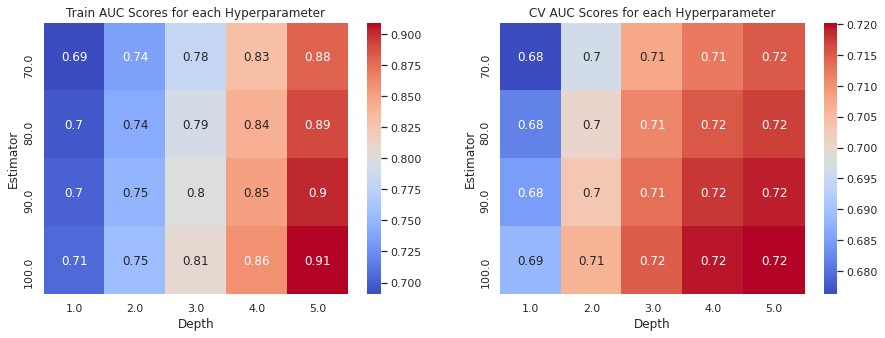

In [75]:
plot_HeatMap(lst_train_scores_set1, lst_cv_scores_set1)

## Training the model with the Best Parameters

In [76]:
GBDT_clf_set1 = xgb.XGBClassifier(max_depth= clf_set1.best_params_['max_depth'],n_estimators= clf_set1.best_params_['n_estimators'])
GBDT_clf_set1.fit(X_tr_set1, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Finding AUC Curve

In [79]:
y_train_proba_set1 = GBDT_clf_set1.predict_proba(X_tr_set1)[:,1]
y_test_proba_set1 = GBDT_clf_set1.predict_proba(X_te_set1)[:,1]
#Finding AUC on train and test data
train_auc_set1 = roc_auc_score(y_train, y_train_proba_set1)
print('Train Auc for set 1')
print(train_auc_set1)
test_auc_set1 = roc_auc_score(y_test, y_test_proba_set1)
print('\n Test Auc for set 1')
print(test_auc_set1)


Train Auc for set 1
0.8777373371729402

 Test Auc for set 1
0.6971917581036333


## Ploting ROC Curve

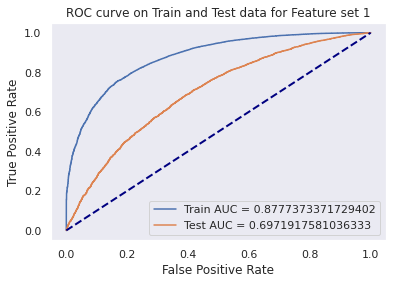

In [80]:
#Finding FPR and TPR both on train and test
train_fpr_set1, train_tpr_set1, train_threshold_set1 = roc_curve(y_train, y_train_proba_set1)
test_fpr_set1, test_tpr_set1, test_threshold_set1 = roc_curve(y_test, y_test_proba_set1)
#Plotting AUC curve
plot_AUC(train_fpr_set1, train_tpr_set1, test_fpr_set1, test_tpr_set1, train_auc_set1, test_auc_set1,'ROC curve on Train and Test data for Feature set 1')

## Confusion Matrix

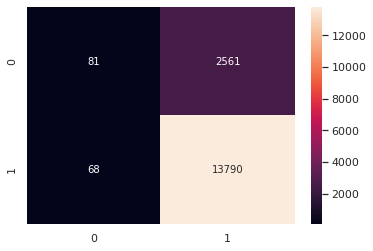

In [81]:
#Predicting y_test
y_test_pred_set1 = GBDT_clf_set1.predict(X_te_set1)
confusion_matrix_set1 = confusion_matrix(y_test, y_test_pred_set1)
#Seaborn Heatmap representaion of Train confusion matrix
sns.heatmap(confusion_matrix_set1, annot=True, fmt="d")


# MODEL2

In [84]:
clf = xgb.XGBClassifier()
#Finding best alpha using GridSearchCV method
clf_set2 = GridSearchCV(estimator = clf, param_grid= param, cv=n_folds, scoring='roc_auc',return_train_score=True)
clf_set2.fit(X_tr_set2, y_train)
clf_set2.best_params_


{'max_depth': 4, 'n_estimators': 100}

In [85]:
lst_train_scores_set2, lst_cv_scores_set2 = getTrain_and_Cv_scores(clf_set2)

In [86]:
print_train_cv_score(lst_train_scores_set2, lst_cv_scores_set2)


---------Train scores----------
Depth :1 Estimator :70 Auc score:0.6984754122627588
Depth :1 Estimator :80 Auc score:0.7032406531423042
Depth :1 Estimator :90 Auc score:0.7072152727572026
Depth :1 Estimator :100 Auc score:0.7110154354832804
Depth :2 Estimator :70 Auc score:0.740180550421898
Depth :2 Estimator :80 Auc score:0.7456700398435151
Depth :2 Estimator :90 Auc score:0.750933044704114
Depth :2 Estimator :100 Auc score:0.7553778550164326
Depth :3 Estimator :70 Auc score:0.7803778133373139
Depth :3 Estimator :80 Auc score:0.7877790307093718
Depth :3 Estimator :90 Auc score:0.7945653638697868
Depth :3 Estimator :100 Auc score:0.8009394593114004
Depth :4 Estimator :70 Auc score:0.8328639015296867
Depth :4 Estimator :80 Auc score:0.8442623858341748
Depth :4 Estimator :90 Auc score:0.8534123504341512
Depth :4 Estimator :100 Auc score:0.8624752392273588
Depth :5 Estimator :70 Auc score:0.8919388411936348
Depth :5 Estimator :80 Auc score:0.9042766790422568
Depth :5 Estimator :90 Auc sc

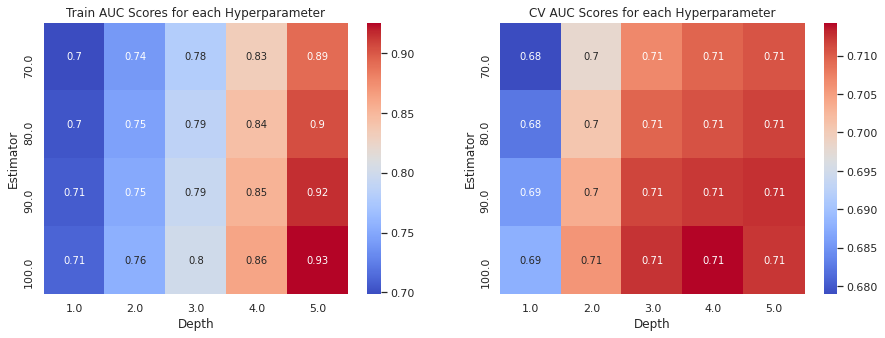

In [87]:
plot_HeatMap(lst_train_scores_set2, lst_cv_scores_set2)

In [88]:
GBDT_clf_set2 = xgb.XGBClassifier(max_depth= clf_set2.best_params_['max_depth'],n_estimators= clf_set2.best_params_['n_estimators'])
GBDT_clf_set2.fit(X_tr_set2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
y_train_proba_set2 = GBDT_clf_set2.predict_proba(X_tr_set2)[:,1]
y_test_proba_set2 = GBDT_clf_set2.predict_proba(X_te_set2)[:,1]
#Finding AUC on train and test data
train_auc_set2 = roc_auc_score(y_train, y_train_proba_set2)
print('Train Auc for set 2')
print(train_auc_set2)
test_auc_set2 = roc_auc_score(y_test, y_test_proba_set2)
print('\n Test Auc for set 2')
print(test_auc_set2)


Train Auc for set 2
0.829174014715033

 Test Auc for set 2
0.6949445953872571


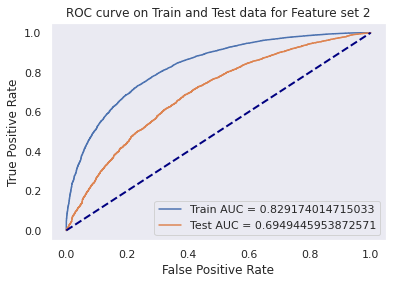

In [91]:
#Finding FPR and TPR both on train and test
train_fpr_set2, train_tpr_set2, train_threshold_set2 = roc_curve(y_train, y_train_proba_set2)
test_fpr_set2, test_tpr_set2, test_threshold_set2 = roc_curve(y_test, y_test_proba_set2)
#Plotting AUC curve
plot_AUC(train_fpr_set2, train_tpr_set2, test_fpr_set2, test_tpr_set2, train_auc_set2, test_auc_set2,'ROC curve on Train and Test data for Feature set 2')

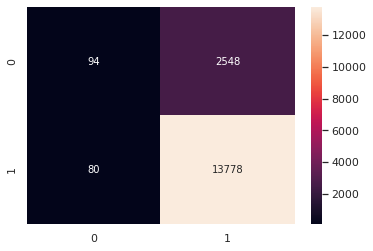

In [94]:
#Predicting y_test
y_test_pred_set2 = GBDT_clf_set2.predict(X_te_set2)
confusion_matrix_set2 = confusion_matrix(y_test, y_test_pred_set2)
#Seaborn Heatmap representaion of Train confusion matrix
sns.heatmap(confusion_matrix_set2, annot=True, fmt="d")


<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [95]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper parameter", "AUC"]
x.add_row(["TFIDF", 'GBDT', clf_set1.best_params_, test_auc_set2])
x.add_row(["W2V", 'GBDT', clf_set2.best_params_, test_auc_set1])
print(x)


+------------+-------+---------------------------------------+--------------------+
| Vectorizer | Model |            Hyper parameter            |        AUC         |
+------------+-------+---------------------------------------+--------------------+
|   TFIDF    |  GBDT | {'max_depth': 5, 'n_estimators': 100} | 0.6949445953872571 |
|    W2V     |  GBDT | {'max_depth': 4, 'n_estimators': 100} | 0.6971917581036333 |
+------------+-------+---------------------------------------+--------------------+
